In [2]:
pip install requests pandas matplotlib

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.4.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.1-cp311-cp311-macosx_10_9_universal2.whl (194 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.3.0-py3-none-any.whl (128 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
API_KEY = "70bf3877a463794d52e1f8b83cc38eae"
CITY_NAME = "Tokyo"


# Construct request URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={CITY_NAME}&appid={API_KEY}&units=metric"

# Make API request
response = requests.get(url)
data = response.json()

# Print the response
print(data)

{'coord': {'lon': 139.6917, 'lat': 35.6895}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 3.71, 'feels_like': -0.81, 'temp_min': 1, 'temp_max': 4.81, 'pressure': 1025, 'humidity': 41, 'sea_level': 1025, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1739284501, 'sys': {'type': 2, 'id': 268395, 'country': 'JP', 'sunrise': 1739223169, 'sunset': 1739261897}, 'timezone': 32400, 'id': 1850144, 'name': 'Tokyo', 'cod': 200}


In [12]:
if "main" in data:
    city = data["name"]
    temp = data["main"]["temp"]
    humidity = data["main"]["humidity"]
    weather = data["weather"][0]["description"]
    
    print(f"City: {city}\nTemperature: {temp}°C\nHumidity: {humidity}%\nWeather: {weather}")
else:
    print("Error fetching weather data.")

City: Tokyo
Temperature: 3.71°C
Humidity: 41%
Weather: clear sky


In [13]:
data_dict = {
    "City": [city],
    "Temperature (°C)": [temp],
    "Humidity (%)": [humidity],
    "Weather Description": [weather]
}

weather_df = pd.DataFrame(data_dict)
print(weather_df)

    City  Temperature (°C)  Humidity (%) Weather Description
0  Tokyo              3.71            41           clear sky


In [26]:
weather_df.to_csv("weather_data.csv", index=False)
print("Data saved to weather_data.csv")

Data saved to weather_data.csv


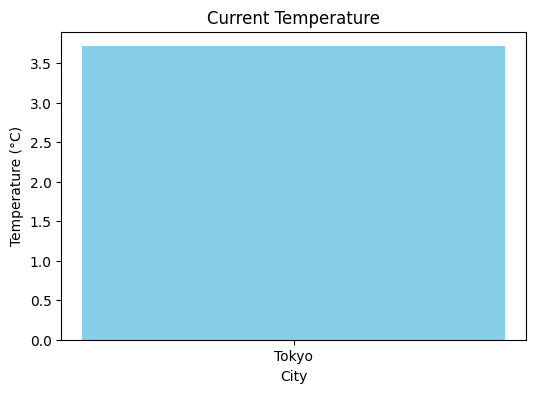

In [15]:
plt.figure(figsize=(6,4))
plt.bar(weather_df["City"], weather_df["Temperature (°C)"], color='skyblue')
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.title("Current Temperature")
plt.show()

In [16]:
cities = ["London", "New York", "Paris", "Tokyo", "Sydney"]
weather_data = []

for city in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    data = response.json()
    
    if "main" in data:
        weather_data.append({
            "City": city,
            "Temperature (°C)": data["main"]["temp"],
            "Humidity (%)": data["main"]["humidity"],
            "Weather Description": data["weather"][0]["description"]
        })

# Convert to DataFrame
multi_city_df = pd.DataFrame(weather_data)
print(multi_city_df)

       City  Temperature (°C)  Humidity (%) Weather Description
0    London              4.51            88     overcast clouds
1  New York             -0.74            51           clear sky
2     Paris              6.10            73     overcast clouds
3     Tokyo              3.48            43           clear sky
4    Sydney             19.93            83       broken clouds


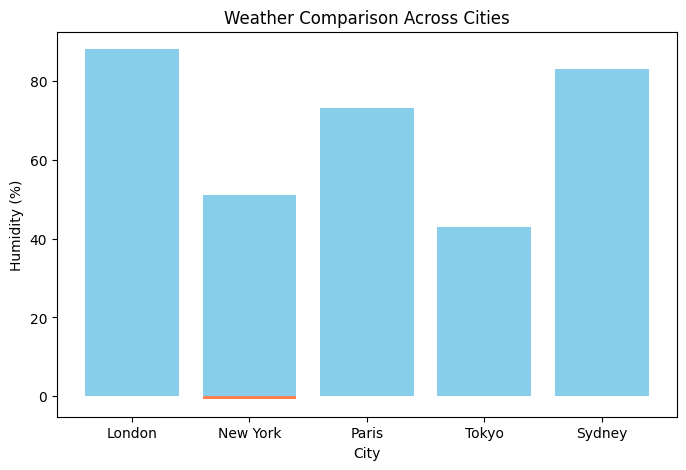

In [28]:
plt.figure(figsize=(8,5))
plt.bar(multi_city_df["City"], multi_city_df["Temperature (°C)"], color='coral')
plt.bar(multi_city_df["City"], multi_city_df["Humidity (%)"], color='skyblue')
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Weather Comparison Across Cities")
plt.show()

In [18]:
API_KEY = "70bf3877a463794d52e1f8b83cc38eae"
CITY_NAME = "Lagos"


# Construct request URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={CITY_NAME}&appid={API_KEY}&units=metric"

# Make API request
response = requests.get(url)
data = response.json()

# Print the response
print(data)

{'coord': {'lon': 3.75, 'lat': 6.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.71, 'feels_like': 37.79, 'temp_min': 32.71, 'temp_max': 32.71, 'pressure': 1005, 'humidity': 57, 'sea_level': 1005, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 5.08, 'deg': 206, 'gust': 4.9}, 'clouds': {'all': 95}, 'dt': 1739284898, 'sys': {'country': 'NG', 'sunrise': 1739253747, 'sunset': 1739296571}, 'timezone': 3600, 'id': 2332453, 'name': 'Lagos', 'cod': 200}


In [19]:
if "main" in data:
    city = data["name"]
    temp = data["main"]["temp"]
    humidity = data["main"]["humidity"]
    weather = data["weather"][0]["description"]
    
    print(f"City: {city}\nTemperature: {temp}°C\nHumidity: {humidity}%\nWeather: {weather}")
else:
    print("Error fetching weather data.")

City: Lagos
Temperature: 32.71°C
Humidity: 57%
Weather: overcast clouds


In [20]:
data_dict = {
    "City": [city],
    "Temperature (°C)": [temp],
    "Humidity (%)": [humidity],
    "Weather Description": [weather]
}

weather_df = pd.DataFrame(data_dict)
print(weather_df)

    City  Temperature (°C)  Humidity (%) Weather Description
0  Lagos             32.71            57     overcast clouds


AttributeError: 'str' object has no attribute 'items'

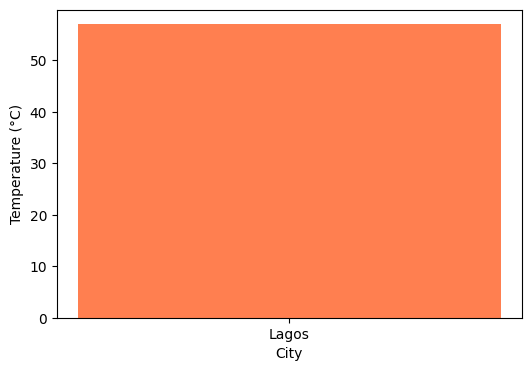

In [25]:
plt.figure(figsize=(6,4))
plt.bar(weather_df["City"], weather_df["Temperature (°C)"], color='skyblue')
plt.bar(weather_df["City"], weather_df["Humidity (%)"], color='coral')
plt.xlabel("City")
plt.ylabel("Temperature (°C)","Humidity (%)")
plt.title("Current Temperature")
plt.show()